In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import requests
import math
from pathlib import Path
from sklearn.linear_model import LinearRegression

In [25]:
import os

### Data Cleaning

In [46]:
# step 1: pull the CSV files into separate DataFrames and store them in a dictionary
stocks_dict = {}
stocks_path = "C:/Users/pola_/OneDrive/Documents/Cesar/Data-bootcamp-UoT/Lessons/week 7/Project-1CZ/Project-1/Stocks"

for stocknamefile in os.listdir(stocks_path):
    if stocknamefile.endswith('.csv'):
        stock_name = os.path.splitext(stocknamefile)[0]
        stocksdf = pd.read_csv(os.path.join(stocks_path, stocknamefile))
        # Add a new column with the stock name
        stocksdf['Stock Name'] = stock_name
        stocks_dict[stock_name] = stocksdf

# Step 2: Concatenate all DataFrames into a single DataFrame
stocksmerged_df = pd.concat(stocks_dict.values(), ignore_index=True)

# Step 3: Drop the 'Dividends' and 'Stock Splits' columns
stocksmerged_df.drop(columns=['Dividends', 'Stock Splits', 'Adj Close', 'Capital Gains'], inplace=True)

stocksmerged_df

,Date,Open,High,Low,Close,Volume,Stock Name
0,1999-11-18 00:00:00-05:00,27.761131,30.506740,24.405391,26.845930,62546380,A
1,1999-11-19 00:00:00-05:00,26.197658,26.235793,24.290988,24.634190,15234146,A
2,1999-11-22 00:00:00-05:00,25.206192,26.845930,24.443524,26.845930,6577870,A
3,1999-11-23 00:00:00-05:00,25.930727,26.617129,24.405390,24.405390,5975611,A
4,1999-11-24 00:00:00-05:00,24.481654,25.587524,24.405387,25.053656,4843231,A
...,...,...,...,...,...,...,...
25638893,2023-05-17 00:00:00-04:00,9.500000,9.900000,9.300000,9.620000,266700,ZYXI
25638894,2023-05-18 00:00:00-04:00,9.650000,9.680000,9.410000,9.580000,217600,ZYXI
25638895,2023-05-19 00:00:00-04:00,9.750000,9.750000,9.480000,9.630000,237700,ZYXI
25638896,2023-05-22 00:00:00-04:00,9.640000,9.800000,9.560000,9.760000,256800,ZYXI


### Price Change Analysis

In [52]:
# Step 4: Convert 'Date' column to datetime with timezone information
stocksmerged_df['Date'] = pd.to_datetime(stocksmerged_df['Date'], utc=True)

# Step 5: Filter data to only include rows from 2015
stocksmerged_df = stocksmerged_df[stocksmerged_df['Date'].dt.year >= 2015]

# Step 6: Calculate the percentage change in price over time for each stock
stocksmerged_df['Percentage Change'] = stocksmerged_df.groupby('Stock Name')['Close'].transform(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)

# Step 7: Create a new DataFrame to store the results
Price_change_df = pd.DataFrame({
    'Stock Name': stocksmerged_df['Stock Name'].unique(),
    'Percentage Change': stocksmerged_df.groupby('Stock Name')['Percentage Change'].last()
})

# Step 8: Filter the stocks based on the percentage change in price
Price_change_df = Price_change_df[
    (Price_change_df['Percentage Change'] <= 200) & (Price_change_df['Percentage Change'] >= -200)
]

# Step 9: Sort the remaining stocks based on the percentage change in price
Price_change_df = Price_change_df.sort_values(by='Percentage Change', ascending=False)

# Reset the index of the result DataFrame
Price_change_df.reset_index(drop=True, inplace=True)
Price_change_df.head(20)

C:\Users\pola_\AppData\Local\Temp\ipykernel_19372\3763841138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocksmerged_df['Date'] = pd.to_datetime(stocksmerged_df['Date'], utc=True)


,Stock Name,Percentage Change
0,SCM,199.521695
1,LFUS,199.250892
2,DRS,199.203198
3,INFU,198.634805
4,TRUP,198.328699
5,ROK,198.303067
6,RRR,198.044922
7,USPH,197.858657
8,AU,197.766997
9,IRT,197.690027


### Creation of the Scatter Plotts and the lineal correlation line and equation.

Equation of the Linear Correlation for SCM: y = 0.0039x + 4.2248
Future Price of SCM after one year from 2023-05-23 04:00:00+00:00: 13.99
Difference in Price after one year: -0.54


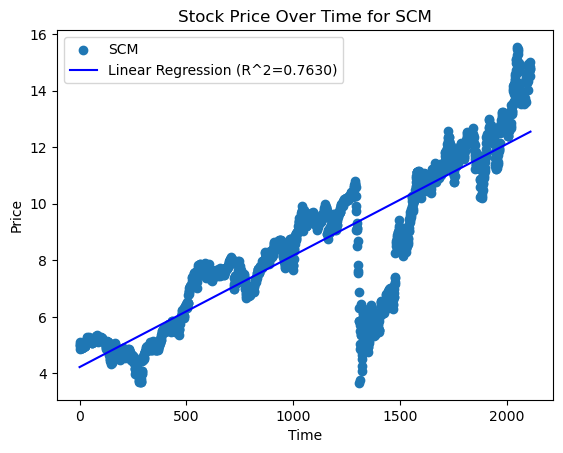

Equation of the Linear Correlation for LFUS: y = 0.0849x + 92.9412
Future Price of LFUS after one year from 2023-05-23 04:00:00+00:00: 303.14
Difference in Price after one year: 38.07


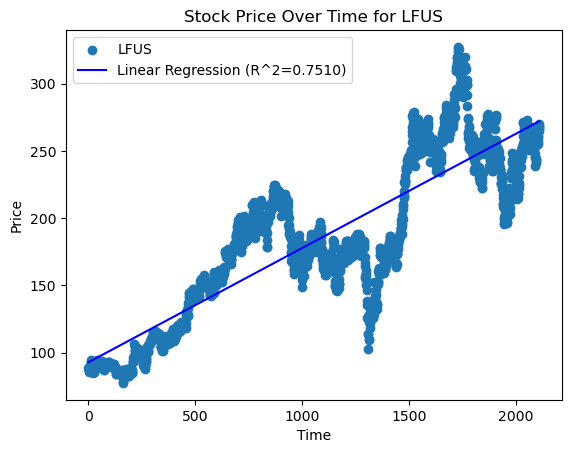

Equation of the Linear Correlation for DRS: y = 0.0060x + -0.6969
Future Price of DRS after one year from 2023-05-23 04:00:00+00:00: 14.09
Difference in Price after one year: -0.93


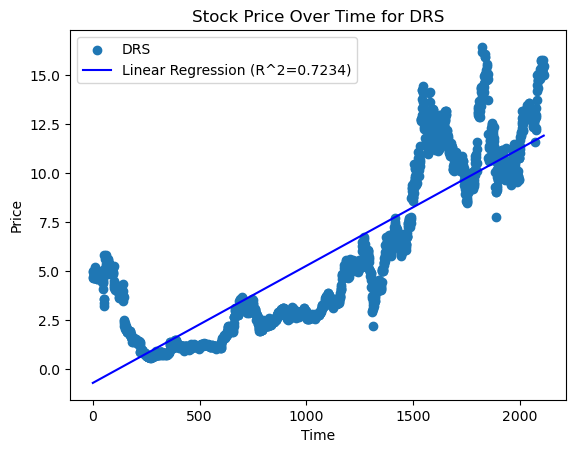

Equation of the Linear Correlation for INFU: y = 0.0065x + 0.1971
Future Price of INFU after one year from 2023-05-23 04:00:00+00:00: 16.24
Difference in Price after one year: 7.49


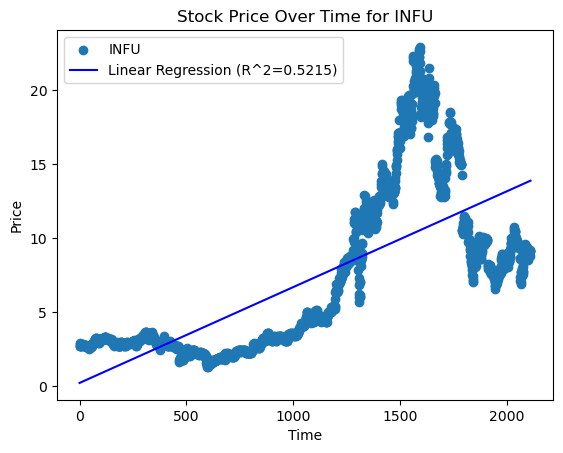

Equation of the Linear Correlation for TRUP: y = 0.0403x + -0.9719
Future Price of TRUP after one year from 2023-05-23 04:00:00+00:00: 98.82
Difference in Price after one year: 77.40


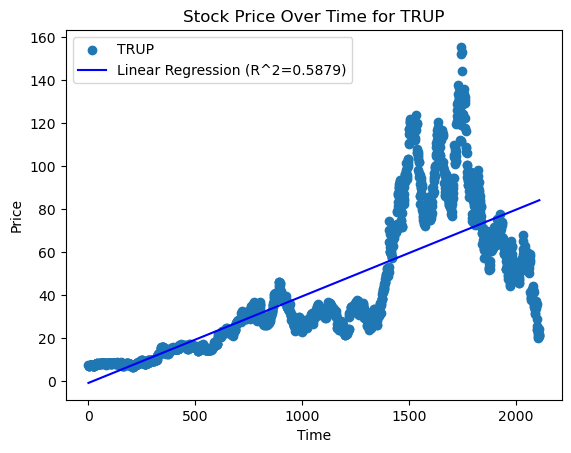

Equation of the Linear Correlation for ROK: y = 0.0998x + 73.6043
Future Price of ROK after one year from 2023-05-23 04:00:00+00:00: 320.91
Difference in Price after one year: 42.45


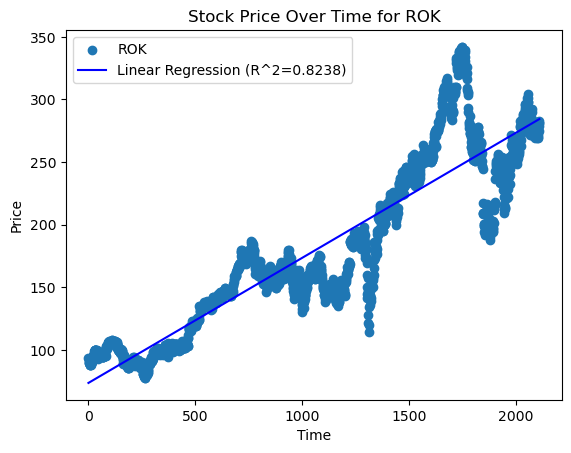

Equation of the Linear Correlation for RRR: y = 0.0141x + 14.1413
Future Price of RRR after one year from 2023-05-23 04:00:00+00:00: 44.44
Difference in Price after one year: -2.10


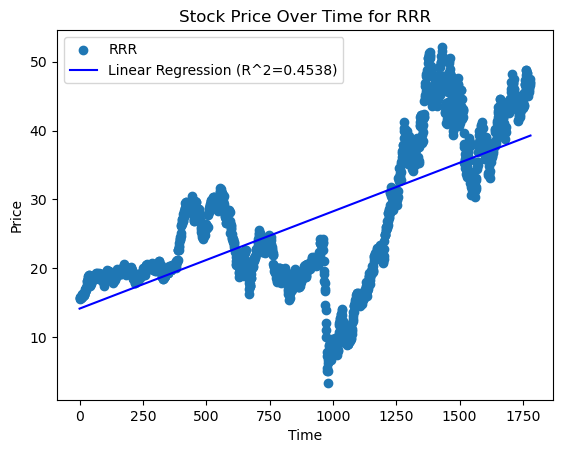

Equation of the Linear Correlation for USPH: y = 0.0320x + 49.1169
Future Price of USPH after one year from 2023-05-23 04:00:00+00:00: 128.26
Difference in Price after one year: 18.88


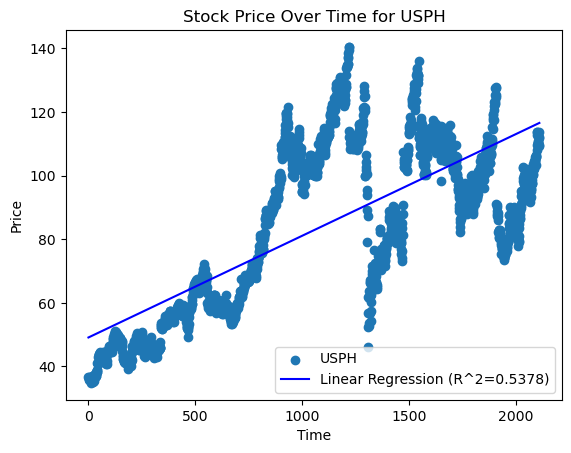

Equation of the Linear Correlation for AU: y = 0.0068x + 7.6682
Future Price of AU after one year from 2023-05-23 04:00:00+00:00: 24.46
Difference in Price after one year: 0.47


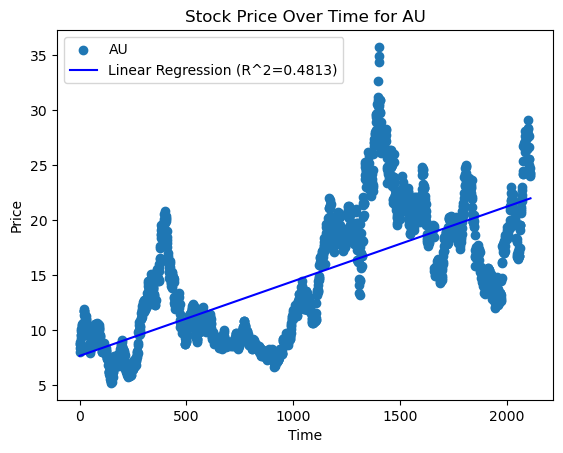

Equation of the Linear Correlation for IRT: y = 0.0083x + 2.3437
Future Price of IRT after one year from 2023-05-23 04:00:00+00:00: 22.82
Difference in Price after one year: 5.74


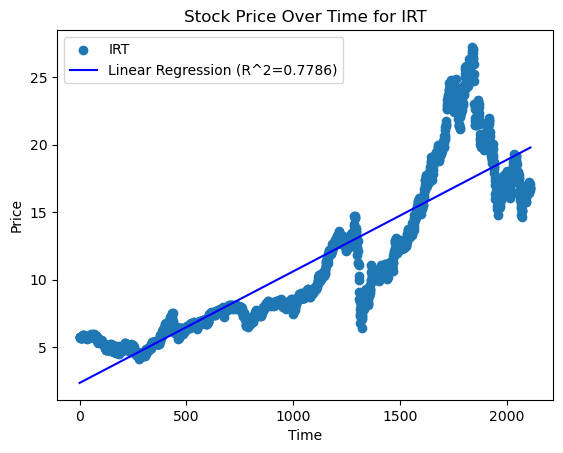

Equation of the Linear Correlation for CLFD: y = 0.0287x + -2.3557
Future Price of CLFD after one year from 2023-05-23 04:00:00+00:00: 68.82
Difference in Price after one year: 31.44


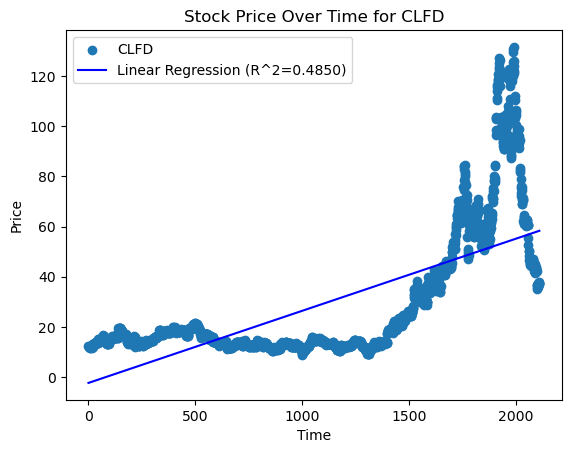

Equation of the Linear Correlation for DKL: y = 0.0158x + 8.1989
Future Price of DKL after one year from 2023-05-23 04:00:00+00:00: 47.33
Difference in Price after one year: -2.98


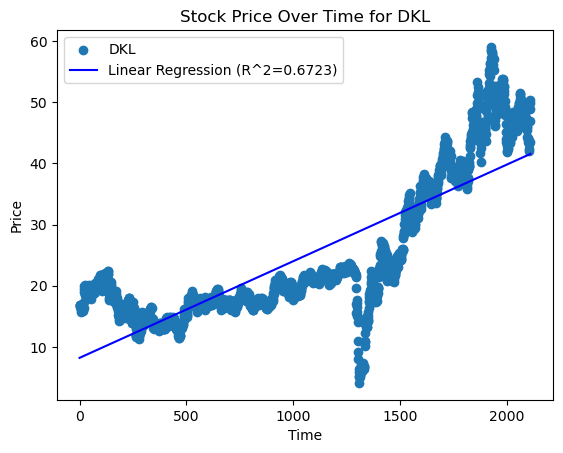

Equation of the Linear Correlation for KFRC: y = 0.0254x + 8.4405
Future Price of KFRC after one year from 2023-05-23 04:00:00+00:00: 71.41
Difference in Price after one year: 10.76


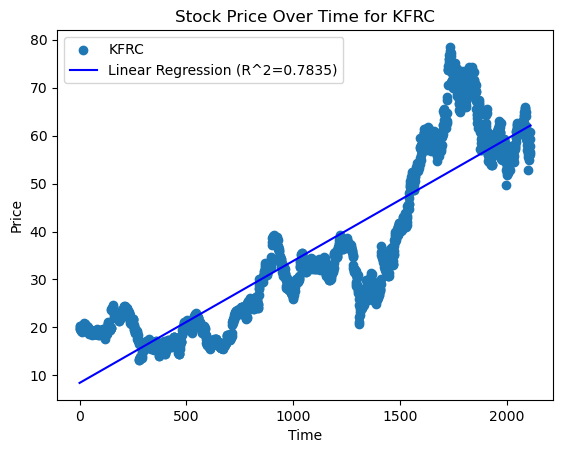

Equation of the Linear Correlation for PH: y = 0.1133x + 66.0131
Future Price of PH after one year from 2023-05-23 04:00:00+00:00: 346.72
Difference in Price after one year: 17.94


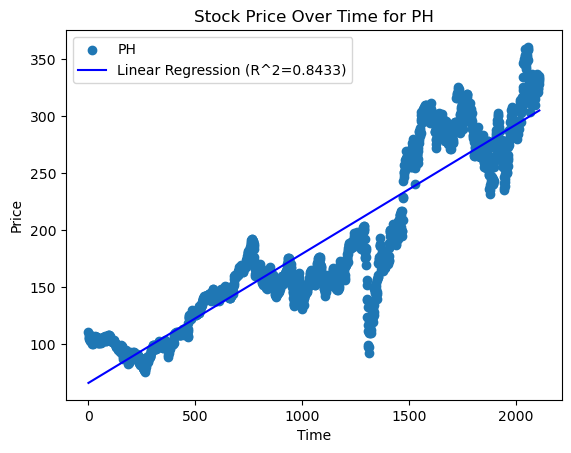

Equation of the Linear Correlation for CLH: y = 0.0352x + 34.1748
Future Price of CLH after one year from 2023-05-23 04:00:00+00:00: 121.46
Difference in Price after one year: -22.35


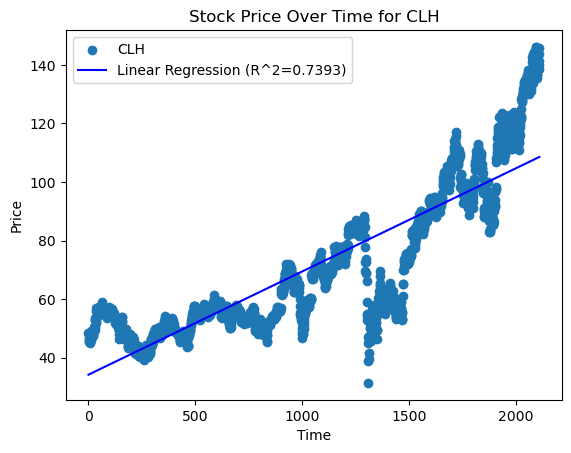

Equation of the Linear Correlation for CPK: y = 0.0444x + 37.2993
Future Price of CPK after one year from 2023-05-23 04:00:00+00:00: 147.21
Difference in Price after one year: 19.72


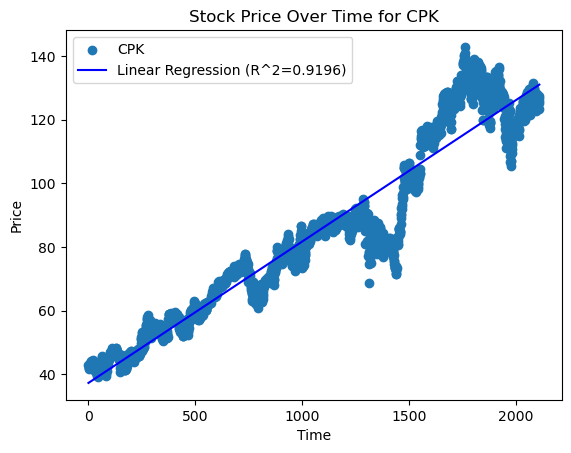

Equation of the Linear Correlation for ELS: y = 0.0274x + 20.8724
Future Price of ELS after one year from 2023-05-23 04:00:00+00:00: 88.83
Difference in Price after one year: 24.73


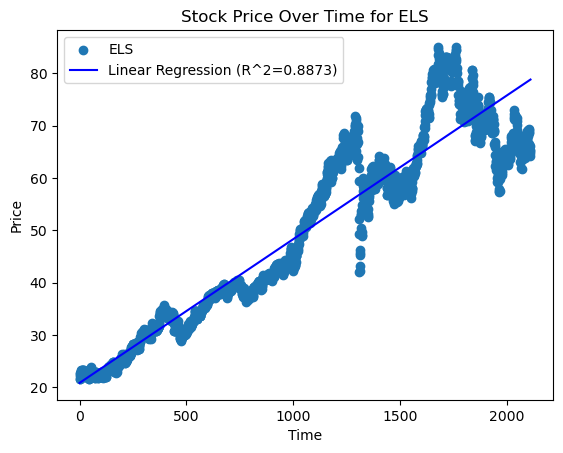

Equation of the Linear Correlation for HQI: y = 0.0071x + 1.5237
Future Price of HQI after one year from 2023-05-23 04:00:00+00:00: 19.05
Difference in Price after one year: -5.77


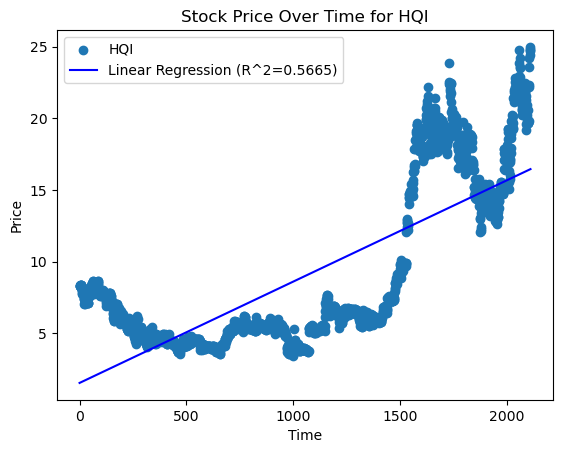

Equation of the Linear Correlation for PLUG: y = 0.0134x + -4.3092
Future Price of PLUG after one year from 2023-05-23 04:00:00+00:00: 28.79
Difference in Price after one year: 19.98


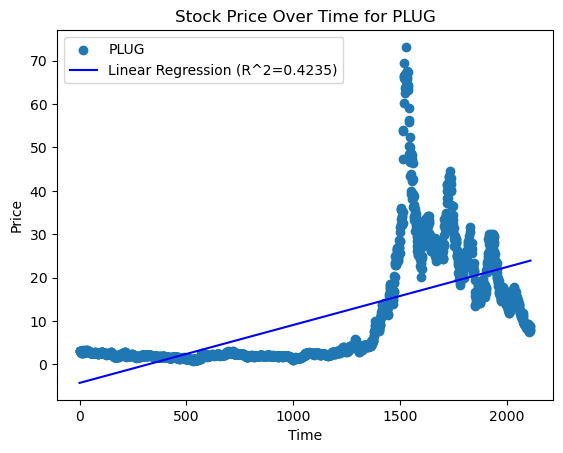

Equation of the Linear Correlation for FERG: y = 0.0479x + 31.0608
Future Price of FERG after one year from 2023-05-23 04:00:00+00:00: 149.74
Difference in Price after one year: 5.07


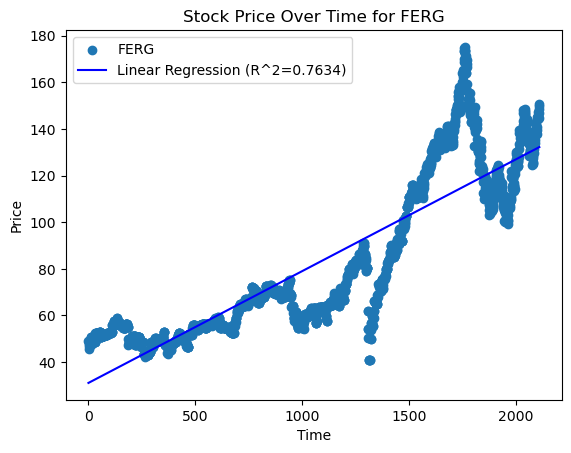

In [48]:
# Step 10: Get the names of the top 20 stocks with the highest percentage change
top_5_stocks = Price_change_df.head(20)['Stock Name'].tolist()

# Step 11: Create scatter plots with linear correlation lines for the top 5 stocks
for stock_name in top_5_stocks:
    stock_data = stocksmerged_df[stocksmerged_df['Stock Name'] == stock_name]
    x = np.arange(len(stock_data))
    y = stock_data['Close']

    plt.scatter(x, y, label=stock_name)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title(f'Stock Price Over Time for {stock_name}')
    
    # Calculate the linear regression
    coefficients = np.polyfit(x, y, 1)
    linear_regression = np.poly1d(coefficients)
    
    # Calculate the R-squared value
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    r_squared = r_value ** 2
    
    # Create the linear correlation line
    plt.plot(x, linear_regression(x), color='blue', label=f'Linear Regression (R^2={r_squared:.4f})')
    
    # Calculate the potential price for one year in the future (assuming 365 days in a year)
    last_date = stock_data['Date'].iloc[-1]
    days_in_one_year = 365
    future_date = last_date + pd.DateOffset(days=days_in_one_year)
    potential_price_one_year = linear_regression(len(stock_data) + days_in_one_year)
    
    # Print the equation of the linear correlation line
    slope, intercept = coefficients
    print(f"Equation of the Linear Correlation for {stock_name}: y = {slope:.4f}x + {intercept:.4f}")
    
    # Calculate the difference in price between the last data point and the calculated future price after one year
    last_price = stock_data['Close'].iloc[-1]
    price_difference = potential_price_one_year - last_price
    print(f"Future Price of {stock_name} after one year from {last_date}: {potential_price_one_year:.2f}")
    print(f"Difference in Price after one year: {price_difference:.2f}")
    
    plt.legend()
    plt.show()

### Stats Analysis

In [49]:
# Step 12: Calculate the changes in price per day ('Close' minus 'Open') from 2015 onwards
stocksmerged_df['Price Change per Day'] = stocksmerged_df.apply(lambda row: row['Close'] - row['Open'], axis=1)

# Step 13: Create a new DataFrame to store the statistics summary
stats_summary_df = stocksmerged_df.groupby('Stock Name')['Price Change per Day'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Step 14: Calculate the R-squared score for each stock
r_squared_scores = stocksmerged_df.groupby('Stock Name').apply(lambda df: stats.linregress(np.arange(len(df)), df['Close'])[2] ** 2)
stats_summary_df['R-squared'] = r_squared_scores

# Step 15: Sort the stocks based on the R-squared (descending order)
sorted_stocks = stats_summary_df.sort_values(by='R-squared', ascending=False)

# Step 15.1: Show the ranked DataFrame from lowest variance to highest variance
ranked_stats_summary_df = sorted_stocks.reset_index()
ranked_stats_summary_df


C:\Users\pola_\AppData\Local\Temp\ipykernel_19372\3787819948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocksmerged_df['Price Change per Day'] = stocksmerged_df.apply(lambda row: row['Close'] - row['Open'], axis=1)


,Stock Name,mean,median,var,std,sem,R-squared
0,LAESV,-5.345500,-5.3455,299.904545,17.317752,12.245500,1.000000e+00
1,WKEYV,0.070000,0.0700,1.185800,1.088945,0.770000,1.000000e+00
2,ASCB,-0.003447,0.0000,0.002047,0.045240,0.002884,9.797331e-01
3,CHEA,-0.001189,0.0000,0.000369,0.019218,0.001273,9.779051e-01
4,EMCG,-0.009062,0.0000,0.003839,0.061959,0.004868,9.760287e-01
...,...,...,...,...,...,...,...
6799,VS,-0.048205,0.0000,9.314776,3.052012,0.066411,3.277775e-07
6800,PGYWW,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000e+00
6801,LIFWW,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000e+00
6802,WEJOW,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000e+00


### Box plots

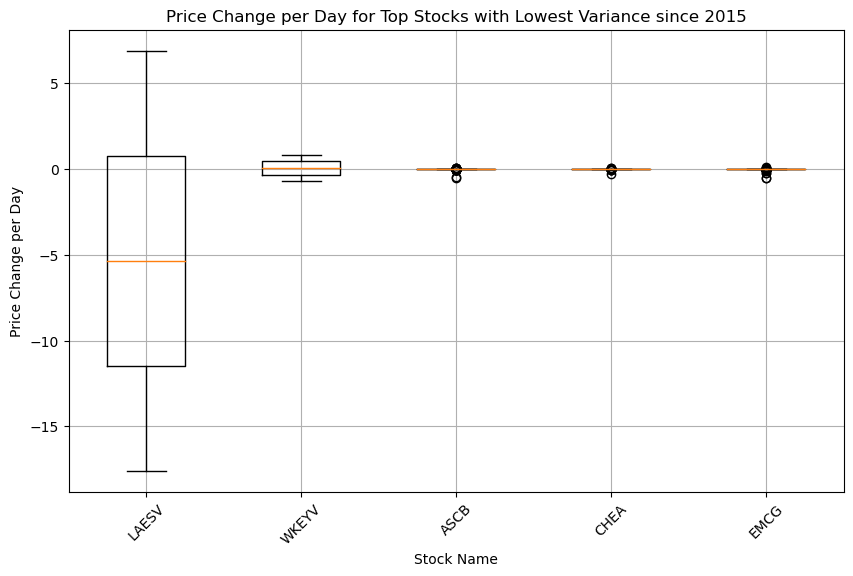

In [50]:
# Step 16: Get the names of the top stocks with the lowest variance
top_stocks_lowest_std = ranked_stats_summary_df.head(5)['Stock Name'].tolist()

# Step 17: Create box plots for the top stocks with the lowest std
plt.figure(figsize=(10, 6))
plt.boxplot([stocksmerged_df[stocksmerged_df['Stock Name'] == stock]['Price Change per Day'] for stock in top_stocks_lowest_std], labels=top_stocks_lowest_std)
plt.xlabel('Stock Name')
plt.ylabel('Price Change per Day')
plt.title('Price Change per Day for Top Stocks with Lowest Variance since 2015')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Final Summary to choose Stocks

In [51]:
# Step 18: Merge Price_change_df with stats_summary_df on 'Stock Name'
merged_df = pd.merge(Price_change_df, stats_summary_df, on='Stock Name')

# Step 19: Sort the merged DataFrame based on percentage change in descending order
merged_df = merged_df.sort_values(by='Percentage Change', ascending=False)

# Step 20: Create a new DataFrame with the desired columns
final_df = merged_df[['Stock Name', 'Percentage Change', 'R-squared', 'std']]

# Reset the index of the result DataFrame
final_df.reset_index(drop=True, inplace=True)

# Step 21: Display the first 20 stocks in the final DataFrame with ranking
print(final_df.head(20))

   Stock Name  Percentage Change  R-squared       std
0         SCM         199.521695   0.762967  0.141177
1        LFUS         199.250892   0.750972  3.282755
2         DRS         199.203198   0.723354  0.215759
3        INFU         198.634805   0.521463  0.276714
4        TRUP         198.328699   0.587905  2.097416
5         ROK         198.303067   0.823824  2.718444
6         RRR         198.044922   0.453816  0.667969
7        USPH         197.858657   0.537761  1.803749
8          AU         197.766997   0.481305  0.402719
9         IRT         197.690027   0.778569  0.214908
10       CLFD         197.611464   0.485003  1.389548
11        DKL         197.521945   0.672303  0.601595
12       KFRC         197.462602   0.783475  0.725891
13         PH         197.143198   0.843279  3.078488
14        CLH         196.698977   0.739288  1.318155
15        CPK         196.617938   0.919595  1.385281
16        ELS         196.030973   0.887253  0.766469
17        HQI         195.85